In [ ]:
import matplotlib.image as image
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
img = plt.imread('rubix.jpg')

In [ ]:
type(img)

numpy.ndarray

In [ ]:
img[:3, :3, 0]

array([[255, 255, 255],
       [255, 255, 255],
       [255, 255, 255]], dtype=uint8)

In [ ]:
img[:3, :3, :]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)

In [ ]:
img.shape

(190, 265, 3)

In [ ]:
265/2

132.5

In [ ]:
img[95, 132, :]

array([254,   0,   2], dtype=uint8)

In [ ]:
indices = np.where(
    (img[:, :, 0] == 254) &
    (img[:, :, 1] == 0) &
    (img[:, :, 2] == 2)
)
indices

(array([ 76,  76,  76,  76,  76,  76,  76,  76,  77,  77,  77,  77,  77,
         77,  77,  77,  77,  77,  78,  78,  78,  78,  78,  78,  78,  78,
         78,  79,  79,  79,  79,  79,  79,  79,  79,  79,  79,  80,  80,
         80,  80,  80,  80,  80,  80,  80,  80,  80,  80,  80,  80,  80,
         80,  80,  80,  80,  80,  80,  80,  80,  80,  80,  80,  80,  80,
         80,  80,  80,  80,  81,  81,  81,  81,  81,  81,  81,  81,  81,
         81,  81,  81,  81,  81,  81,  81,  81,  81,  81,  81,  81,  81,
         81,  81,  81,  81,  81,  81,  81,  81,  81,  81,  82,  82,  82,
         82,  82,  82,  82,  82,  82,  82,  82,  82,  82,  82,  82,  82,
         82,  82,  82,  82,  82,  82,  82,  82,  82,  82,  82,  82,  82,
         82,  82,  82,  83,  83,  83,  83,  83,  83,  83,  83,  83,  83,
         83,  83,  83,  83,  83,  83,  83,  83,  83,  83,  83,  83,  83,
         83,  83,  83,  83,  83,  83,  83,  83,  83,  84,  84,  84,  84,
         84,  84,  84,  84,  84,  84,  84,  84,  84

In [ ]:
# rows ---> height
# cols ----> width
# img.shape is in h*w format viz. opposite to conventional graphics format
img[:10, : 3, 0]

array([[255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255]], dtype=uint8)

In [ ]:
indices = np.argwhere(
    (img[:, :, 0] == 254) &
    (img[:, :, 1] == 0) &
    (img[:, :, 2] == 2)
)
indices.shape

(729, 2)

In [ ]:
indices

array([[ 76, 136],
       [ 76, 137],
       [ 76, 138],
       ...,
       [135, 173],
       [135, 174],
       [135, 175]])

In [ ]:
import pandas as pd
data = pd.DataFrame(indices, columns=['row', 'col'])
data

,row,col
0,76,136
1,76,137
2,76,138
3,76,139
4,76,140
...,...,...
724,135,171
725,135,172
726,135,173
727,135,174


In [ ]:
# Compute diff within each group
data['diff'] = data.groupby('row')['col'].diff()

In [ ]:
data.head()

,row,col,diff
0,76,136,NaN
1,76,137,1.0
2,76,138,1.0
3,76,139,1.0
4,76,140,1.0


In [ ]:
# Wherever diff != 1, start of a new segment
# We assign a unique segment ID using cumulative sum
data['segment'] = (data['diff'] != 1).cumsum()
data.head()

,row,col,diff,segment
0,76,136,NaN,1
1,76,137,1.0,1
2,76,138,1.0,1
3,76,139,1.0,1
4,76,140,1.0,1


In [ ]:
# Group by original group column and the segment id
segment_ends = data.groupby(['row', 'segment'])['col'].agg(['first', 'last']).reset_index()

In [ ]:
segment_ends

,row,segment,first,last
0,76,1,136,143
1,77,2,100,101
2,77,3,136,143
3,78,4,96,96
4,78,5,136,143
...,...,...,...,...
65,131,66,168,175
66,132,67,168,175
67,133,68,168,175
68,134,69,168,175


In [ ]:
segment_ends['v_diff'] = segment_ends['row'].diff()
segment_ends

,row,segment,first,last,v_diff
0,76,1,136,143,NaN
1,77,2,100,101,1.0
2,77,3,136,143,0.0
3,78,4,96,96,1.0
4,78,5,136,143,0.0
...,...,...,...,...,...
65,131,66,168,175,1.0
66,132,67,168,175,1.0
67,133,68,168,175,1.0
68,134,69,168,175,1.0


In [ ]:
segment_ends['v_segment'] = (segment_ends['v_diff'] != 1).cumsum()
segment_ends.head(20)

,row,segment,first,last,v_diff,v_segment
0,76,1,136,143,NaN,1
1,77,2,100,101,1.0,1
2,77,3,136,143,0.0,2
3,78,4,96,96,1.0,2
4,78,5,136,143,0.0,3
5,79,6,96,97,1.0,3
6,79,7,136,143,0.0,4
7,80,8,80,95,1.0,4
8,80,9,120,135,0.0,5
9,81,10,80,95,1.0,5


In [ ]:
v_segment_ends = segment_ends.groupby(['v_segment'])['row'].agg(['first', 'last']).reset_index()

In [ ]:
v_segment_ends

,v_segment,first,last
0,1,76,77
1,2,77,78
2,3,78,79
3,4,79,80
4,5,80,81
5,6,81,82
6,7,82,83
7,8,83,84
8,9,84,85
9,10,85,85


In [ ]:
import cv2

In [ ]:
help(cv2.imread)

Help on built-in function imread:

imread(...)
    imread(filename[, flags]) -> retval
    .   @brief Loads an image from a file.
    .   
    .   @anchor imread
    .   
    .   The `imread` function loads an image from the specified file and returns OpenCV matrix. If the image cannot be
    .   read (because of a missing file, improper permissions, or unsupported/invalid format), the function
    .   returns an empty matrix.
    .   
    .   Currently, the following file formats are supported:
    .   
    .   -   Windows bitmaps - \*.bmp, \*.dib (always supported)
    .   -   GIF files - \*.gif (always supported)
    .   -   JPEG files - \*.jpeg, \*.jpg, \*.jpe (see the *Note* section)
    .   -   JPEG 2000 files - \*.jp2 (see the *Note* section)
    .   -   Portable Network Graphics - \*.png (see the *Note* section)
    .   -   WebP - \*.webp (see the *Note* section)
    .   -   AVIF - \*.avif (see the *Note* section)
    .   -   Portable image format - \*.pbm, \*.pgm, \*.ppm, \*.p

In [ ]:
# Polygon corner points coordinates
pts = np.array([[76, 136], [76, 143], [79, 136], [79, 143]], np.int32)

In [ ]:


# Reading an image in default
# mode
image = cv2.imread('rubix.jpg')

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)



pts = pts.reshape((-1, 1, 2))

isClosed = True

# Blue color in BGR
color = (0, 0, 0)

# Line thickness of 2 px
thickness = 2

# Using cv2.polylines() method
# Draw a Blue polygon with
# thickness of 1 px
image_rgb = cv2.polylines(image_rgb, [pts],
					isClosed, color, thickness)




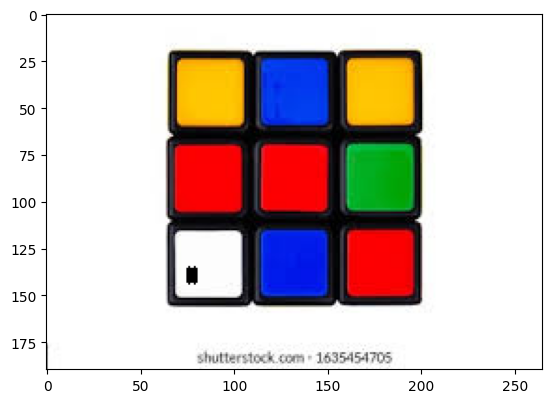

In [ ]:
plt.imshow(image_rgb)